In [ ]:
!unzip train.zip

Archive:  train.zip
  inflating: train/Happy/images (34).jpg  
  inflating: train/Happy/images (29).jpg  
  inflating: train/Neutral/images (39).jpg  
  inflating: train/Happy/images (19).jpg  
  inflating: train/Happy/images (22).jpg  
  inflating: train/Happy/images (32).jpg  
  inflating: train/Happy/images (27).jpg  
  inflating: train/Happy/images (33).jpg  
  inflating: train/Happy/images (28).jpg  
  inflating: train/Neutral/images (41).jpg  
  inflating: train/Happy/images (31).jpg  
  inflating: train/Happy/images (14).jpg  
  inflating: train/Happy/images (20).jpg  
  inflating: train/Happy/images (13).jpg  
  inflating: train/Happy/images (16).jpg  
  inflating: train/Neutral/images (42).jpg  
  inflating: train/Happy/images (21).jpg  
  inflating: train/Happy/images (24).jpg  
  inflating: train/Happy/images (35).jpg  
  inflating: train/Happy/images (18).jpg  
  inflating: train/Neutral/images (44).jpg  
  inflating: train/Happy/images (30).jpg  
  inflating: train/Happy/i

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.losses import categorical_crossentropy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Working with pre trained model

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:

model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [ ]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/train",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )


Found 350 images belonging to 7 classes.


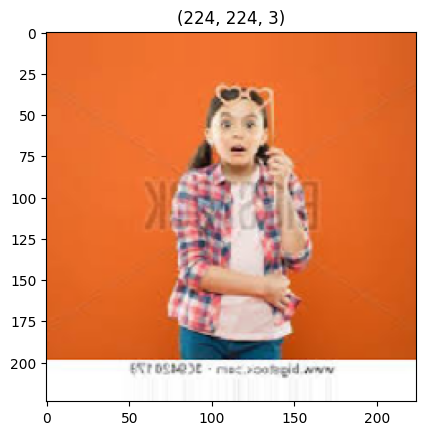

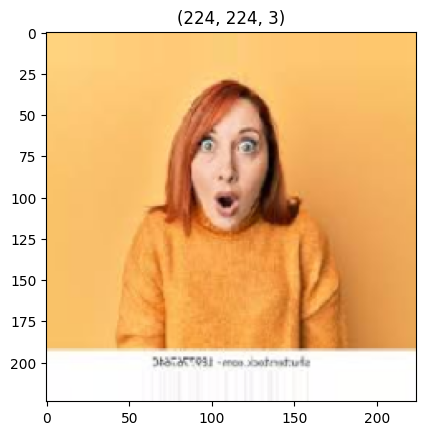

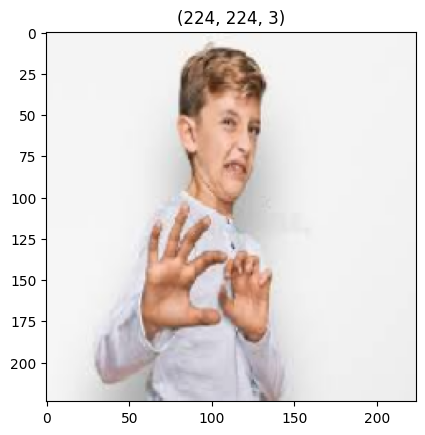

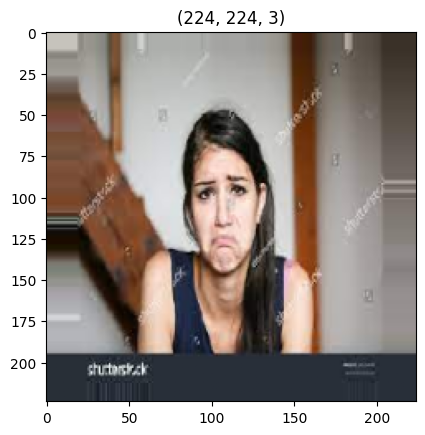

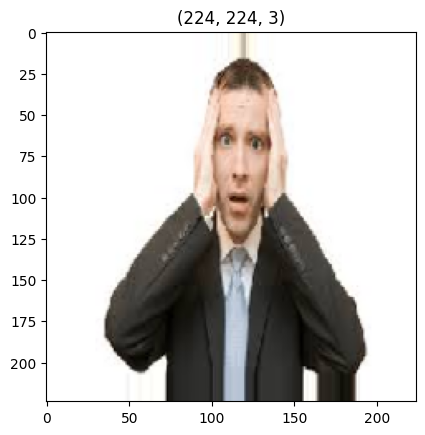

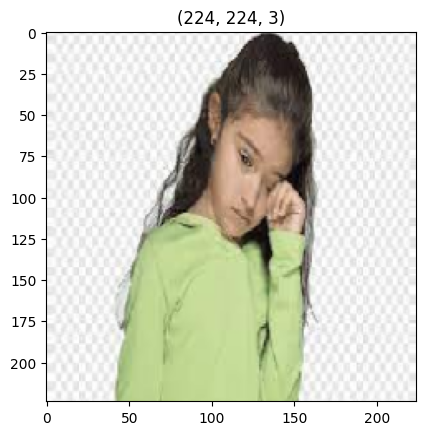

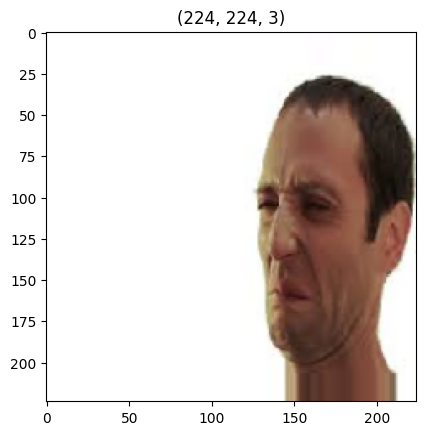

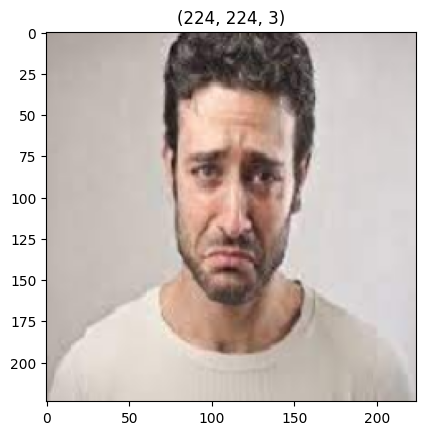

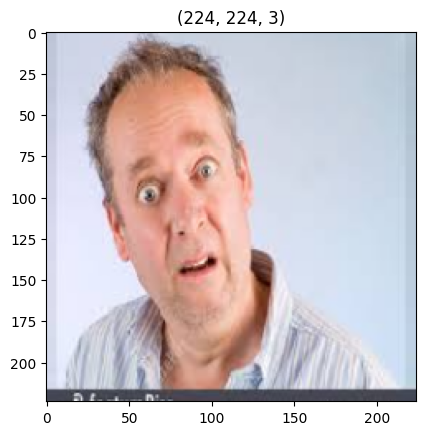

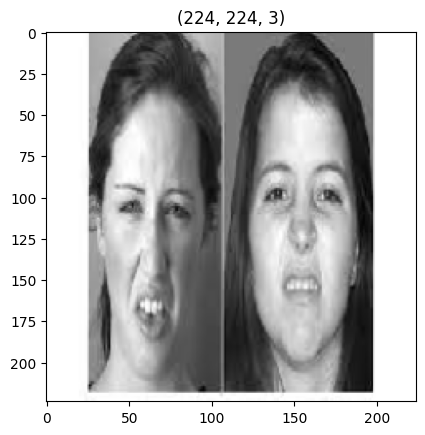

In [ ]:
# to visualize the images in the traing data denerator

t_img, label = train_data.__next__()  # Use __next__() instead of .next()

#-----------------------------------------------------------------------------
# function when called will prot the images
def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images
plotImages(t_img, label)

In [ ]:
import keras
print(keras.__version__)


3.5.0


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=5, verbose=1, mode='auto')

# Model checkpoint
mc = ModelCheckpoint(
   filepath="best_model.keras",
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='auto'
)

# Putting callbacks in a list
call_back = [es, mc]


In [ ]:
hist = model.fit(
    train_data,
    steps_per_epoch=10,
    epochs=30,
    validation_data=val_data,
    validation_steps=8,
    callbacks=[es, mc]
)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2509 - loss: 7.5453
Epoch 1: val_accuracy improved from -inf to 0.56641, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.2509 - loss: 7.6723 - val_accuracy: 0.5664 - val_loss: 2.8305
Epoch 2/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.2188 - loss: 7.0471

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy did not improve from 0.56641
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 709ms/step - accuracy: 0.2188 - loss: 7.0471 - val_accuracy: 0.5000 - val_loss: 3.5398
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5393 - loss: 4.5138
Epoch 3: val_accuracy improved from 0.56641 to 0.75781, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.5420 - loss: 4.4817 - val_accuracy: 0.7578 - val_loss: 1.2871
Epoch 4/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7000 - loss: 2.4192
Epoch 4: val_accuracy did not improve from 0.75781
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 684ms/step - accuracy: 0.7000 - loss: 2.4192 - val_accuracy: 0.6702 - val_loss: 1.7978
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6861 - loss: 2.0055
Epoch 5: val_accuracy improved from 0.75781 to 0.86719, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.6897 - loss: 1.9823 - val_accuracy: 0.8672 - val_loss: 0.9285
Epoch

In [ ]:

# Loading the best fit model
from keras.models import load_model
model = load_model("/content/best_model.keras")

In [ ]:

h =  hist.history
h.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

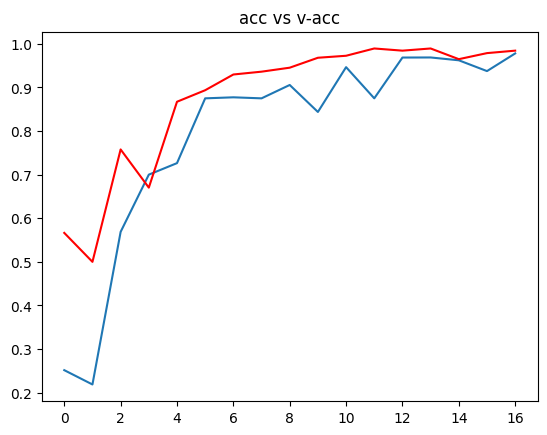

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

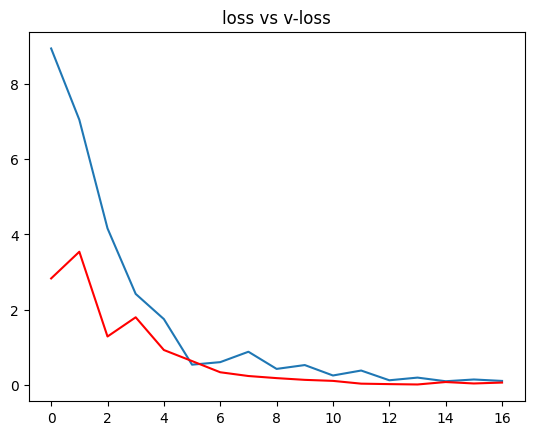

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:

# just to map o/p values
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step
 the image is of Happy


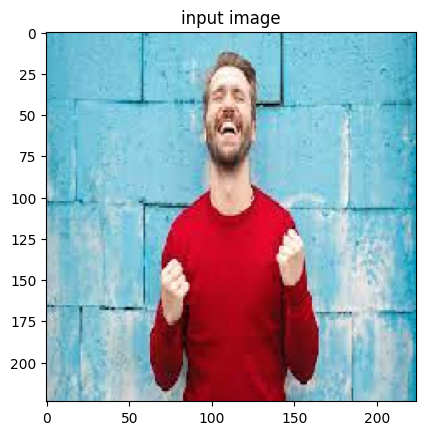

In [ ]:
# path for the image to see if it predics correct class

path = "/content/image.jpeg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
 the image is of Angry


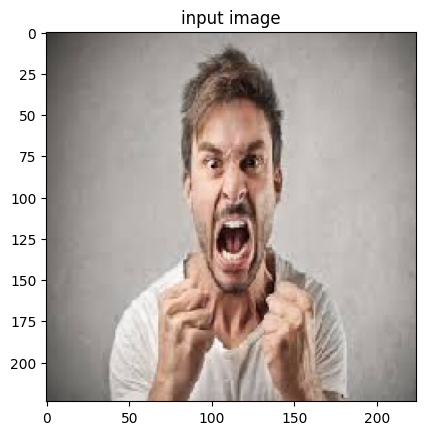

In [ ]:
# path for the image to see if it predics correct class

path = "/content/image1.jpeg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()